# This notebook will be mainly used for the Capstone Project, about Airbnb at Rio de Janeiro (BR)

![alt text](rio2.jpg "Rio de Janeiro")
Source: https://www.passagenspromo.com.br/blog/wp-content/uploads/2019/03/praias-no-rio-de-janeiro-1-740x415.jpg

## 1. Introduction

### A description of the problem and the final objective

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics at Rio de Janeiro, BR for 2020.
The <b> objective </b> is explore and clustering this dataset, in a way that I can identify the best places to stay at Rio de Janeiro based on venues around the accommodate. In this notebook I will explore interactions and hidden insights from the available dataset.

# 2. Data

### A description of the data and how it will be used to solve the problem

The data includes all needed information to find out more about hosts, geographical availability, reviews and more. 
The dataset has around 20.858 rows and 106 columns, but I will just use 18 that I think it's more relevant. I will combine this dataset with foursquare information about venues in the neighbourhood to find the best place to stay.

<b> Source: </b>

Detailed Listings data for Rio de Janeiro: http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz

In [55]:
# Libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization

#!conda install -c conda-forge geopandas
import geopandas as gpd #library to handle with geopandas

import folium # map rendering library
from IPython.display import HTML, display

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import geocoder

import matplotlib.cm as cm
import matplotlib.colors as colors

import requests
from pandas.io.json import json_normalize

from sklearn.cluster import KMeans

%matplotlib inline

In [56]:
airbnb_df_complete = pd.read_csv('listings_rio.csv')

The Dataset has 106 columns and 35.793 rows

In [3]:
# shape of the dataset
airbnb_df_complete.shape

(35793, 106)

In [4]:
airbnb_df_complete.head(2)

id                         listing_url       scrape_id last_scraped  \
0  17878  https://www.airbnb.com/rooms/17878  20200524171540   2020-05-25   
1  21280  https://www.airbnb.com/rooms/21280  20200524171540   2020-05-25   

                                                name  \
0  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1                   Renovated Modern Apt. Near Beach   

                                             summary  \
0  Discounts for long term stays. Please contact ...   
1  Immaculately renovated top-floor apartment ove...   

                                               space  \
0  - Beautiful, sunny 2 bedroom (90 square meters...   
1  Immaculately renovated top-floor apartment in ...   

                                         description experiences_offered  \
0  Discounts for long term stays. Please contact ...                none   
1  Immaculately renovated top-floor apartment ove...                none   

                               neighborhood_overview notes  \
0  This is the one of the bests spots in Rio. Bec...   NaN   
1  This is the best neighborhood in Zona Sul.  Fo...   NaN   

                                             transit  \
0  Excellent location. Close to all major attract...   
1  The new metro station is just a few steps away...   

                                              access  \
0  The entire apartment is yours. It's like your ...   
1  This is an older "Art Deco" style building, so...   

                                         interaction  \
0  I will be available throughout your stay shoul...   
1  Someone will be there at check in and check ou...   

                                         house_rules  thumbnail_url  \
0  Please leave the apartment in a clean fashion ...            NaN   
1  This is a booking agreement for rental of a tw...            NaN   

   medium_url                                        picture_url  \
0         NaN  https://a0.muscache.com/im/pictures/65320518/3...   
1         NaN  https://a0.muscache.com/im/pictures/60851312/b...   

   xl_picture_url  host_id                                 host_url host_name  \
0             NaN    68997  https://www.airbnb.com/users/show/68997  Matthias   
1             NaN    81163  https://www.airbnb.com/users/show/81163     Jules   

   host_since                                    host_location  \
0  2010-01-08  Rio de Janeiro, State of Rio de Janeiro, Brazil   
1  2010-02-14                 Chicago, Illinois, United States   

                                          host_about  host_response_time  \
0  I  am a  journalist/writer. Lived for 15 years...      within an hour   
1  Hi I am Jules and I have a beautiful apartment...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 t   
1               100%                  90%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/67b13...   
1  https://a0.muscache.com/im/users/81163/profile...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/67b13...         Copacabana   
1  https://a0.muscache.com/im/users/81163/profile...            Ipanema   

   host_listings_count  host_total_listings_count  \
0                  2.0                        2.0   
1                  0.0                        0.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1               ['email', 'phone', 'reviews', 'kba']                    t   

  host_identity_verified                                  street  \
0                      t  Rio de Janeiro, Rio de Janeiro, Brazil   
1                      t              Rio de Janeiro, RJ, Brazil   

  neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  \

# 3. Exploratory Data Analysis and Methodology 


### 3.1. Relevant Columns

To achieve my goals, I will just use 25 columns that have the essential data about, location, price, score rating, score rating to location, type of room and geographic location.

In [5]:
airbnb_df = airbnb_df_complete[['id','listing_url','name','neighbourhood','zipcode','latitude','longitude',
'property_type','room_type','bathrooms','bedrooms','beds','bed_type','price','host_id',
'cancellation_policy','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
,'review_scores_communication','review_scores_location','review_scores_value', 'host_is_superhost','amenities']]

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35793 entries, 0 to 35792
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           35793 non-null  int64  
 1   listing_url                  35793 non-null  object 
 2   name                         35735 non-null  object 
 3   neighbourhood                33907 non-null  object 
 4   zipcode                      34049 non-null  object 
 5   latitude                     35793 non-null  float64
 6   longitude                    35793 non-null  float64
 7   property_type                35793 non-null  object 
 8   room_type                    35793 non-null  object 
 9   bathrooms                    35726 non-null  float64
 10  bedrooms                     35720 non-null  float64
 11  beds                         35464 non-null  float64
 12  bed_type                     35793 non-null  object 
 13  price           

### 3.2. Missing Values

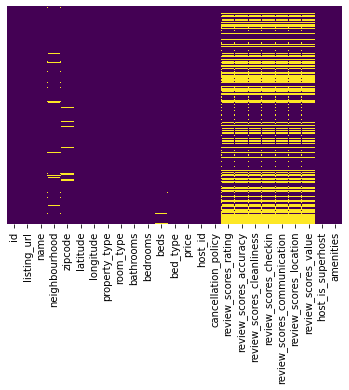

In [7]:
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In this dataset we have some missing values, about them:

* <b> 'zipcode': </b> Other coluns have this information with more quality

* <b> 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location','review_scores_value': </b> I will drop this columns because more than of 50% of the information is missing

* <b> 'name', 'neighbourhood', 'bathrooms','bedrooms','beds', 'host_is_superhost': </b> I will ignore the missing value and drop the rows that does not have information

In [57]:
# Drop this columns that have more than 50% of missing values 

airbnb_df.drop(['zipcode','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_value'], axis='columns',inplace=True)

# Drop the rowns that have missing values to this columns: 'name', 'neighbourhood', 'bathrooms','bedrooms','beds'
airbnb_df.dropna(inplace=True)

# Check the Heatmap for missing values
#sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 3.3.  Neighbourhood feature

#### Distribution of Airbnbs in the Rio de Janeiro neighborhoods

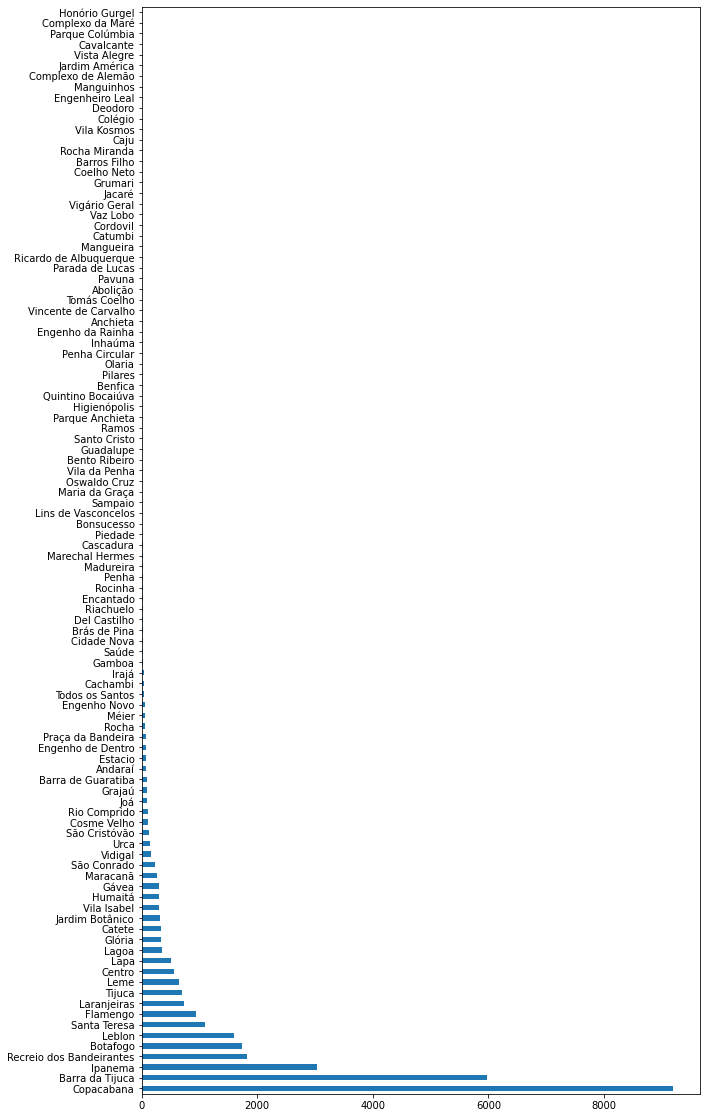

In [9]:
airbnb_df['neighbourhood'].value_counts().plot(kind='barh', figsize=(10,20))

#### Distribution of Airbnbs in the Rio de Janeiro neighborhoods - Map Visualization

In [10]:
# Get Rio de Janeiro's latitude and longitude 
geolocator = Nominatim(user_agent="rio_explorer")
location = geolocator.geocode('Rio de Janeiro, BR')
rio_latitude = location.latitude
rio_longitude = location.longitude
print('The geograpical coordinate of Rio de Janeiro are {}, {}.'.format(rio_latitude, rio_longitude))

The geograpical coordinate of Rio de Janeiro are -22.9110137, -43.2093727.


In [11]:
# DataSet with all neighbourhoods and the amount of airbnb 
rio_neighbourhood = airbnb_df.groupby('neighbourhood')['id'].count().reset_index()
rio_neighbourhood.rename(columns={'id': 'counts_airbnb'}, inplace=True)
#rio_neighbourhood.head()

Function to get the latitude and longitude

In [12]:
# Defining a function to get the Latitude and Longitude
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = "NaN"
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is "NaN"):
        g = geocoder.arcgis('{}, Rio de Janeiro, Brazil'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
                
    return lat_lng_coords

Create a table with the neighbourhood, latitude, longitude and the amount of airbnbs

In [13]:
# Append the latitude and longitude to the dataframe of neighbourhood
rio_neighbourhood['latitude'], rio_neighbourhood['longitude'] = zip(*rio_neighbourhood['neighbourhood'].apply(get_latlng))

<b> Amount of Airbnbs in the neighborhoods of Rio de Janeiro </b>

In [14]:
# create map of Rio de Janeiro using latitude and longitude values of the neighbourhood
map_rio = folium.Map(location=[rio_latitude, rio_longitude], zoom_start=12)

for i in range(0,len(rio_neighbourhood)):
    label = '{}, {}'.format(rio_neighbourhood.iloc[i]['neighbourhood'], rio_neighbourhood.iloc[i]['counts_airbnb'])
    label = folium.Popup(label, parse_html=True)    
    folium.Marker(
        [rio_neighbourhood.iloc[i]['latitude'], 
        rio_neighbourhood.iloc[i]['longitude']], 
        popup=label
    ).add_to(map_rio)
    
map_rio

It's difficult analyze the map with all this information. So I'm going to work with the top 10 neighborhoods that have the highest concentration of Airbnbs

#### Top 10 Neighborhoods that have the largest amount of Airbnb

In [15]:
# Dataset with top10 neighbourhood and the informations about them
rio_neighbourhood_top10 = rio_neighbourhood.sort_values(by='counts_airbnb', ascending=False).head(10).reset_index()
rio_neighbourhood_top10.drop(['index'], axis=1,inplace=True)
#rio_neighbourhood_top10.head(2)

# Dataset with Airbnbs that are in the top10 neighbourhood
airbnb_df_top10 = airbnb_df.loc[airbnb_df['neighbourhood'].isin(rio_neighbourhood_top10.neighbourhood.unique().tolist())].reset_index()
airbnb_df_top10.drop(['index'], axis=1,inplace=True)
#airbnb_df_top10.head(2)

<i> Top 10 Neighborhoods with the most Airbnb </i>

In [16]:
rio_neighbourhood_top10

neighbourhood  counts_airbnb  latitude  longitude
0                Copacabana           9194 -22.97593  -43.18960
1           Barra da Tijuca           5982 -23.01071  -43.30837
2                   Ipanema           3031 -22.98441  -43.20180
3  Recreio dos Bandeirantes           1824 -23.01385  -43.46526
4                  Botafogo           1729 -22.95138  -43.18413
5                    Leblon           1596 -22.98428  -43.22270
6              Santa Teresa           1099 -22.91627  -43.19250
7                  Flamengo            936 -22.93409  -43.17604
8               Laranjeiras            727 -21.63333  -41.68333
9                    Tijuca            707 -22.92780  -43.23608

#### Top 10 Neighborhoods that have the largest amount of Airbnb - Map Visualization

In [17]:
# create map of Rio de Janeiro using latitude and longitude values
map_rio_top10 = folium.Map(location=[rio_latitude, rio_longitude], zoom_start=11)

# add markers to map
for lat, log, neighbourhood in zip(airbnb_df_top10['latitude'], airbnb_df_top10['longitude'], airbnb_df_top10['neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, log],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map_rio_top10)
    
for i in range(0,len(rio_neighbourhood_top10)):
    label = '{}, {}'.format(rio_neighbourhood_top10.iloc[i]['neighbourhood'], rio_neighbourhood_top10.iloc[i]['counts_airbnb'])
    label = folium.Popup(label, parse_html=True)    
    folium.Marker(
        [rio_neighbourhood_top10.iloc[i]['latitude'], 
        rio_neighbourhood_top10.iloc[i]['longitude']], 
        popup=label
    ).add_to(map_rio_top10)
    
#map_rio_top10

### 3.4. Room type feature

Text(0.5, 1.0, 'Room Type Distribuition')

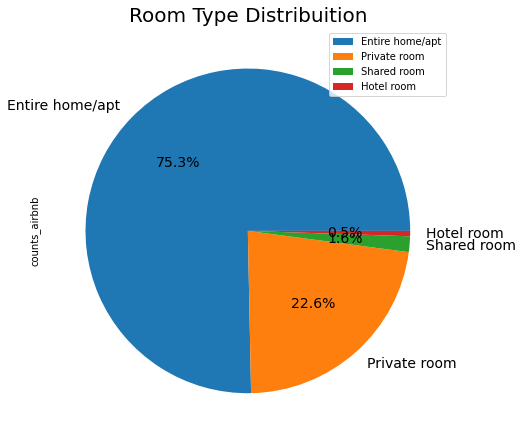

In [18]:
# Create a dataframe with the amount of airbnb by room type
room_type = airbnb_df_top10['room_type'].value_counts().to_frame().reset_index()
room_type.rename(columns={'room_type': 'counts_airbnb', 'index': 'room_type'}, inplace=True)

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
room_type.plot(kind='pie', y = 'counts_airbnb', ax=ax1, autopct='%1.1f%%', labels=room_type['room_type'], fontsize=14)
plt.title("Room Type Distribuition", fontsize=20)

The highest concentration of the room type is <b> Entire home/apt </b> with 75%. I believe this happens because guests like to have more privacy

### 3.5. Property type feature

Text(0.5, 1.0, 'Property type Distribuition')

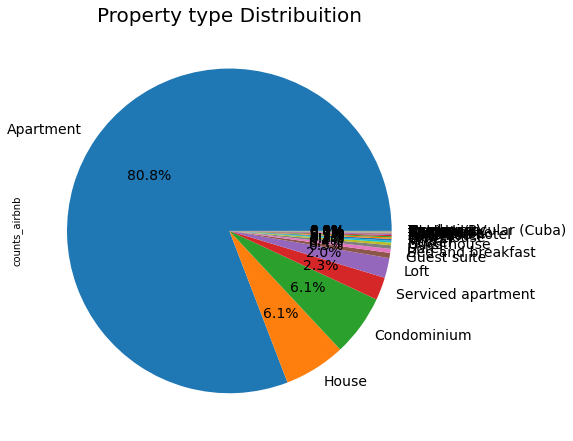

In [19]:
# Create a dataframe with the amount of airbnb by room type
property_type = airbnb_df_top10['property_type'].value_counts().to_frame().reset_index()
property_type.rename(columns={'property_type': 'counts_airbnb', 'index': 'property_type'}, inplace=True)

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
property_type.plot(kind='pie', y = 'counts_airbnb', ax=ax1, autopct='%1.1f%%', legend = False, labels=property_type['property_type'], fontsize=14)
plt.title("Property type Distribuition", fontsize=20)

<i> Distribution of the main types of properties </i>

In [20]:
property_type.head()

property_type  counts_airbnb
0           Apartment          21683
1               House           1645
2         Condominium           1635
3  Serviced apartment            611
4                Loft            530

The highest concentration of the property type is <b> Apartment with 80,8%; House with 6,1%; Condominum with 6,1% with 75%.</b> I believe this happens because guests wants more comfort and safety

### 3.6. Superhost feature

Text(0.5, 1.0, 'Superhost Distribuition')

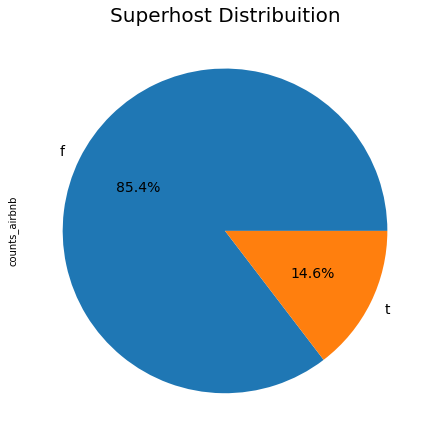

In [21]:
# Create a dataframe with the amount of airbnb by room type
host_is_superhost = airbnb_df_top10['host_is_superhost'].value_counts().to_frame().reset_index()
host_is_superhost.rename(columns={'host_is_superhost': 'counts_airbnb', 'index': 'host_is_superhost'}, inplace=True)

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
host_is_superhost.plot(kind='pie', y = 'counts_airbnb', ax=ax1, autopct='%1.1f%%', legend = False, labels=host_is_superhost['host_is_superhost'], fontsize=14)
plt.title("Superhost Distribuition", fontsize=20)

<b> F </b> = It's not a superhost / <b>T</b> = It's a superhost </b>

<i> "Superhosts are experienced hosts who are an excellent example for other hosts and receive extraordinary experiences for their guests" </i> 
<b> From:</b> https://www.airbnb.com.br/help/article/828/o-que-%C3%A9-um-superhost

This information is very useful to choose a good place that offers a quality stay

### 3.7. Cancellation Policy feature

Text(0.5, 1.0, 'Cancellation Policy Distribuition')

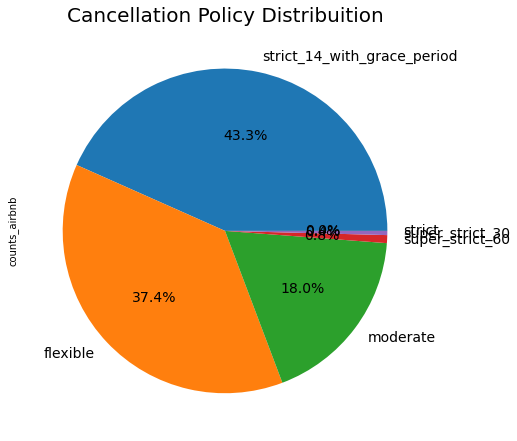

In [22]:
# Create a dataframe with the amount of airbnb by room type
cancellation_policy = airbnb_df_top10['cancellation_policy'].value_counts().to_frame().reset_index()
cancellation_policy.rename(columns={'cancellation_policy': 'counts_airbnb', 'index': 'cancellation_policy'}, inplace=True)

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
cancellation_policy.plot(kind='pie', y = 'counts_airbnb', ax=ax1, autopct='%1.1f%%', legend = False, labels=cancellation_policy['cancellation_policy'], fontsize=14)
plt.title("Cancellation Policy Distribuition", fontsize=20)

<i> "On Airbnb, hosts can choose which cancellation policies to offer guests and review them before booking." </i> <b> From:</b> https://www.airbnb.com.br/home/cancellation_policies
    
Basically, depending on the cancellation policy if you make the cancellation you can have the full refund or not the reservation. In the top 10 neighborhoods, 37,4% has a flexible policy and 43,3% has a strict 14 with grace period, meaning you can cancel up to 14 days before check-in and get a full refund



### 3.8. Price feature

The price column has the symbol $, it's difficult work with this information. So it will be necessary drop this symbol

In [23]:
# Replace the $ to ""
airbnb_df_top10['price'] = airbnb_df_top10['price'].str.replace("[$, ]", "").astype("float")

In [24]:
airbnb_df_top10[['name','price']].head(2)

name  price
0  Very Nice 2Br in Copacabana w. balcony, fast WiFi  188.0
1                   Renovated Modern Apt. Near Beach  442.0

<b> Price Distribuition by the top 10 Neighbourhood </b>

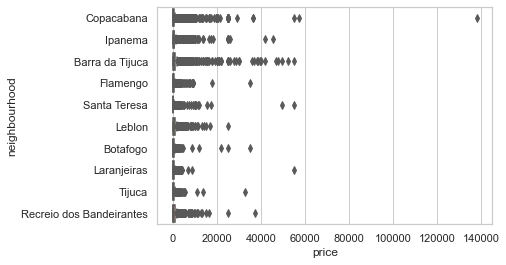

In [25]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="price", y="neighbourhood", data=airbnb_df_top10, palette="Set2", orient="h")

In the graph above, it is possible to identify that the prices per neighborhood have many outliers. In some cases the daily rate costs more than $ 10,000

In the graph bellow, it's possible to identify the largest, the smallest, the average of the values of each neighborhood

In [26]:
airbnb_df_top10.groupby('neighbourhood')['price'].describe()

count         mean          std   min    25%  \
neighbourhood                                                             
Barra da Tijuca           5982.0  1124.925610  2805.198773   0.0  221.0   
Botafogo                  1729.0   437.079815  1281.155630  38.0  127.0   
Copacabana                9194.0   678.804982  2479.803686   0.0  160.0   
Flamengo                   936.0   626.873932  1778.867027  39.0  126.0   
Ipanema                   3031.0   923.596173  2198.740596  33.0  238.0   
Laranjeiras                727.0   519.489684  2130.991280  38.0  121.5   
Leblon                    1596.0   893.331454  1507.727440  50.0  282.0   
Recreio dos Bandeirantes  1824.0   834.197368  1666.696844  28.0  193.5   
Santa Teresa              1099.0   582.703367  2615.150838  33.0  100.0   
Tijuca                     707.0   555.059406  1546.278619  33.0   99.0   

                            50%     75%       max  
neighbourhood                                      
Barra da Tijuca           448.0  1001.0   54981.0  
Botafogo                  221.0   448.0   34998.0  
Copacabana                249.0   498.0  138262.0  
Flamengo                  227.0   448.0   34998.0  
Ipanema                   398.0   802.0   45697.0  
Laranjeiras               231.0   498.0   54981.0  
Leblon                    448.0   896.0   24998.0  
Recreio dos Bandeirantes  358.5   906.0   37598.0  
Santa Teresa              181.0   332.0   55315.0  
Tijuca                    200.0   553.0   32944.0

#### Remove the outliers by neighbourhood

Function removes outliers that are above 3rd quartile and below 1st quartile by neighbourhood

In [27]:
def removal_of_outliers(df, neighbourhood_desc, distance):

    new_piece = df[(df["neighbourhood"]==neighbourhood_desc)]["price"]

    # defining quartiles and interquartile range
    q1 = new_piece.quantile(0.25)
    q3 = new_piece.quantile(0.75)
    IQR=q3-q1

    #print(neighbourhood_desc, " -> ", "Q1: ",q1, ";", " Q3: ", q3, ";", " IQR: ", IQR)

    trimmed = df[(df.neighbourhood==neighbourhood_desc)&(df.price>(q1-distance*IQR))&(df.price<(q3+distance*IQR))]

    #print("Before -> ", neighbourhood_desc, ":", df.shape)
    #print("After -> ", neighbourhood_desc, ":", trimmed.shape)

    return trimmed

<i> Applying a function to remove places that have non-standard prices for the neighborhood </i>

In [28]:
# Create a dataset for each neighborhood
barra_tijuca_df = removal_of_outliers(airbnb_df_top10, 'Barra da Tijuca',2)
botafogo_df = removal_of_outliers(airbnb_df_top10, 'Botafogo',2)
copacabana_df = removal_of_outliers(airbnb_df_top10, 'Copacabana',2)
flamengo_df = removal_of_outliers(airbnb_df_top10, 'Ipanema',2)
laranjeiras_df = removal_of_outliers(airbnb_df_top10, 'Laranjeiras',2)
leblon_df = removal_of_outliers(airbnb_df_top10, 'Leblon',2)
recreio_df = removal_of_outliers(airbnb_df_top10, 'Recreio dos Bandeirantes',2)
santa_teresa_df = removal_of_outliers(airbnb_df_top10, 'Santa Teresa',2)
tijuca_df= removal_of_outliers(airbnb_df_top10, 'Tijuca',2)        

In [29]:
# Backup to compare with the new database withou outliers
airbnb_df_top10_old = airbnb_df_top10.copy()   

# Append the dataset with each neighborhood 
airbnb_df_top10 = pd.DataFrame()
airbnb_df_top10 = airbnb_df_top10.append([barra_tijuca_df,botafogo_df,copacabana_df,flamengo_df,laranjeiras_df,leblon_df,recreio_df,santa_teresa_df,tijuca_df])

In [30]:
#sns.heatmap(airbnb_df_top10.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

<b> Compare the dataset with outliers x dataset without outliers </b>

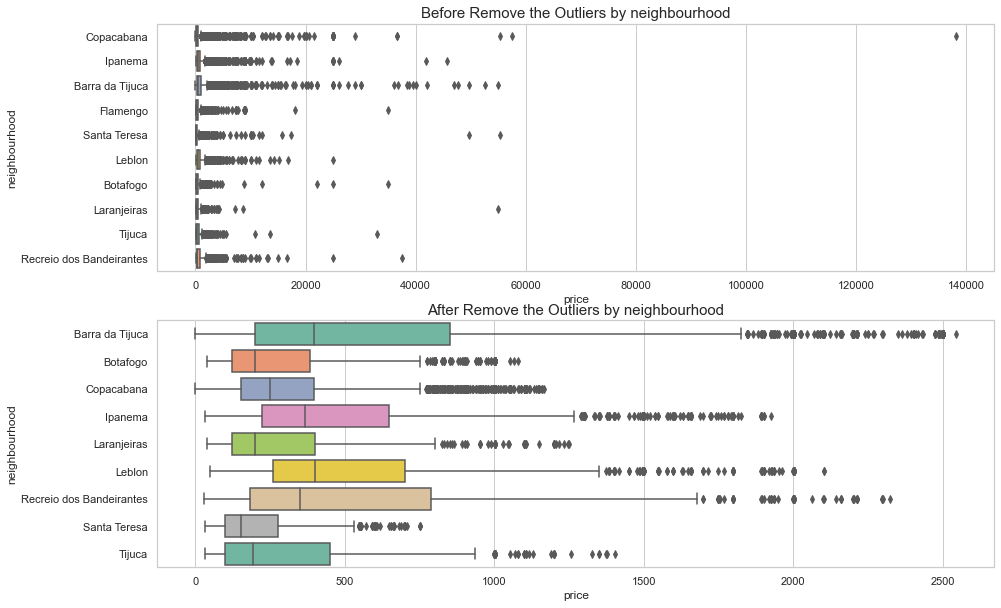

As a result of oulier removal 3020 rows of data were removed.


In [31]:
#plot the results
sns.set(style="whitegrid")

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Plot a simple histogram with binsize determined automatically
sns.boxplot(x="price", y="neighbourhood", data=airbnb_df_top10_old, palette="Set2", orient="h", ax=ax1)
ax1.set_title("Before Remove the Outliers by neighbourhood", fontsize=15)

sns.boxplot(x="price", y="neighbourhood", data=airbnb_df_top10, palette="Set2", orient="h", ax=ax2)
ax2.set_title("After Remove the Outliers by neighbourhood", fontsize=15)

plt.show()

print("As a result of oulier removal " + str(airbnb_df_top10_old.shape[0]-airbnb_df_top10.shape[0]) + " rows of data were removed.")

### 3.4. Filters in the dataset

* <b> Room Type: </b> Filter the room_type equal to <b> "Entire home/apt" </b> (75% of places have that value)

In [32]:
# Filter the dataset
airbnb_df_top10 = airbnb_df_top10[airbnb_df_top10['room_type'] == 'Entire home/apt']

* <b> Property Type: </b> Filter the property_type equal to <b>  "Apartment" </b> (80% of places have that value)

In [33]:
# Filter the dataset
airbnb_df_top10 = airbnb_df_top10[airbnb_df_top10['property_type'] == 'Apartment']

* <b>Cancellation Policy: </b> Use pandas.get_dummies to achieve one-hot-encoding from cancellation_policy data 

In [34]:
# Create the one-hot-encoding
one_hot_cancellation = pd.get_dummies(airbnb_df_top10['cancellation_policy'])

# Drop column cancellation_policy as it is now encoded
airbnb_df_top10 = airbnb_df_top10.drop('cancellation_policy',axis = 1)

# Join the encoded airbnb_df_top10
airbnb_df_top10 = airbnb_df_top10.join(one_hot_cancellation)

* <b> SuperHost: </b> Filter the host_is_superhost equal to <b> "T" </b> (This is a way to filter a good place that offers a quality stay)

In [35]:
airbnb_df_top10 = airbnb_df_top10[airbnb_df_top10['host_is_superhost'] == 't']

In [36]:
airbnb_df_top10.shape

(2196, 22)

<b> After all filters and processing the Flamengo neighbourhood no longer appears in the dataset. Now, the dataset has 2.196 and 9 neighbourhood, they are: </b>

In [37]:
print(airbnb_df_top10.neighbourhood.unique())

['Barra da Tijuca' 'Botafogo' 'Copacabana' 'Ipanema' 'Laranjeiras'
 'Leblon' 'Recreio dos Bandeirantes' 'Santa Teresa' 'Tijuca']


#### Top 9 Neighborhoods that have the largest amount of Airbnb - Map Visualization (After all filters and processing)

In [38]:
# Dataset with top10 neighbourhood and the informations about them
rio_neighbourhood = airbnb_df_top10.groupby('neighbourhood')['id'].count().reset_index()
rio_neighbourhood.rename(columns={'id': 'counts_airbnb'}, inplace=True)
rio_neighbourhood['latitude'], rio_neighbourhood['longitude'] = zip(*rio_neighbourhood['neighbourhood'].apply(get_latlng))

In [39]:
rio_neighbourhood

neighbourhood  counts_airbnb  latitude  longitude
0           Barra da Tijuca            265 -23.01071  -43.30837
1                  Botafogo            126 -22.95138  -43.18413
2                Copacabana           1019 -22.97593  -43.18960
3                   Ipanema            458 -22.98441  -43.20180
4               Laranjeiras             25 -21.63333  -41.68333
5                    Leblon            192 -22.98428  -43.22270
6  Recreio dos Bandeirantes             61 -23.01385  -43.46526
7              Santa Teresa             39 -22.91627  -43.19250
8                    Tijuca             11 -22.92780  -43.23608

In [40]:
# create map of Rio de Janeiro using latitude and longitude values
map_rio_top10 = folium.Map(location=[rio_latitude, rio_longitude], zoom_start=11)

# add markers to map
for name, lat, log, neighbourhood in zip(airbnb_df_top10['name'], airbnb_df_top10['latitude'], airbnb_df_top10['longitude'], airbnb_df_top10['neighbourhood']):
    label1 = '{}, {}'.format(neighbourhood, name)
    label1 = folium.Popup(label1, parse_html=True)
    folium.CircleMarker(
        [lat, log],
        radius=5,
        popup=label1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map_rio_top10)

for i in range(0,len(rio_neighbourhood)):
    label = '{}, {}'.format(rio_neighbourhood.iloc[i]['neighbourhood'], rio_neighbourhood.iloc[i]['counts_airbnb'])
    label = folium.Popup(label, parse_html=True)    
    folium.Marker(
        [rio_neighbourhood.iloc[i]['latitude'], 
        rio_neighbourhood.iloc[i]['longitude']], 
        popup=label
    ).add_to(map_rio_top10)
    
map_rio_top10

# 4. FourSquare Data

### Top 100 venues from each neighborhood

Credential information:

In [41]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    LIMIT = 100
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            id,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id',
                    'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
# DataSet with the venues at Rio de Janeiro neighbourhood
rio_top10_venues = getNearbyVenues(names=rio_neighbourhood['neighbourhood'],latitudes=rio_neighbourhood['latitude'],longitudes=rio_neighbourhood['longitude'])

Barra da Tijuca
Botafogo
Copacabana
Ipanema
Laranjeiras
Leblon
Recreio dos Bandeirantes
Santa Teresa
Tijuca


<b> Distribuition of venues by neighborhood </b>

In [44]:
rio_top10_venues.groupby('Neighborhood').count().Venue

Neighborhood
Barra da Tijuca             100
Botafogo                    100
Copacabana                  100
Ipanema                     100
Leblon                      100
Recreio dos Bandeirantes    100
Santa Teresa                100
Tijuca                      100
Name: Venue, dtype: int64

The Foursquare does not return information for the to the neighborhood of Laranjeira. In this way we will continues with the others neighborhoods

In [45]:
rio_top10_venues.head()

id     Neighborhood  Neighborhood Latitude  \
0  <built-in function id>  Barra da Tijuca              -23.01071   
1  <built-in function id>  Barra da Tijuca              -23.01071   
2  <built-in function id>  Barra da Tijuca              -23.01071   
3  <built-in function id>  Barra da Tijuca              -23.01071   
4  <built-in function id>  Barra da Tijuca              -23.01071   

   Neighborhood Longitude          Venue  Venue Latitude  Venue Longitude  \
0               -43.30837       Bodytech      -23.012093       -43.310137   
1               -43.30837         Skinna      -23.007915       -43.306868   
2               -43.30837  Bráz Pizzaria      -23.012513       -43.311310   
3               -43.30837    .Org Bistrô      -23.013486       -43.305598   
4               -43.30837     Balada Mix      -23.009365       -43.306493   

                  Venue Category  
0           Gym / Fitness Center  
1             Seafood Restaurant  
2                    Pizza Place  
3  Vegetarian / Vegan Restaurant  
4                    Salad Place

In [46]:
print('There are {} uniques categories.'.format(len(rio_top10_venues['Venue Category'].unique())))

There are 163 uniques categories.


### Top10 Categories by Neighborhood

In [47]:
# one hot encoding
rio_onehot = pd.get_dummies(rio_top10_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rio_onehot['Neighborhood'] = rio_top10_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rio_onehot.columns[-1]] + list(rio_onehot.columns[:-1])
rio_onehot = rio_onehot[fixed_columns]

# agroup the neighborhood
rio_grouped = rio_onehot.groupby('Neighborhood').mean().reset_index()
rio_grouped.head()

# Function to return the most common venues per beighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rio_grouped['Neighborhood']

for ind in np.arange(rio_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Barra da Tijuca                 Hotel                 Beach   
1                  Botafogo  Brazilian Restaurant                Hostel   
2                Copacabana                 Hotel                   Bar   
3                   Ipanema                 Hotel          Bathing Area   
4                    Leblon            Steakhouse    Italian Restaurant   
5  Recreio dos Bandeirantes  Gym / Fitness Center                Bakery   
6              Santa Teresa  Brazilian Restaurant                Hostel   
7                    Tijuca                   Bar                   Gym   

  3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
0    Italian Restaurant                   Bar               Steakhouse   
1            Steakhouse             Bookstore           Ice Cream Shop   
2          Bathing Area  Gym / Fitness Center           Ice Cream Shop   
3  Gym / Fitness Center                 Beach        French Restaurant   
4            Food Stand                   Bar  Fruit & Vegetable Store   
5  Brazilian Restaurant            Steakhouse              Snack Place   
6                   Bar           Music Venue                    Plaza   
7           Pizza Place                Bakery     Gym / Fitness Center   

  6th Most Common Venue      7th Most Common Venue    8th Most Common Venue  \
0             Beach Bar       Gym / Fitness Center                   Bistro   
1           Pizza Place               Dance Studio  Fruit & Vegetable Store   
2           Coffee Shop                  Juice Bar                     Park   
3  Brazilian Restaurant                       Café                      Bar   
4             Bookstore               Bathing Area     Gym / Fitness Center   
5           Pizza Place                        Bar             Bathing Area   
6         Historic Site  Middle Eastern Restaurant              Pizza Place   
7        Chocolate Shop                Coffee Shop                Bookstore   

     9th Most Common Venue 10th Most Common Venue  
0           Chocolate Shop            Pizza Place  
1                      Bar   Gym / Fitness Center  
2  Fruit & Vegetable Store                    Spa  
3      Japanese Restaurant     Italian Restaurant  
4           Ice Cream Shop      French Restaurant  
5      Japanese Restaurant                   Park  
6           Chocolate Shop                   Café  
7                Pet Store    Japanese Restaurant

# 5. Cluster and Results

### Includes in each Airbnb the top 100 venues in the neighborhood in which it's located

In [48]:
# Merge the top 100 venues by neighborhood with the dataset with all Airbnbs
rio_merged_venues = airbnb_df_top10
rio_merged_venues = rio_merged_venues.join(rio_grouped.set_index('Neighborhood'), on='neighbourhood')
rio_merged_venues = rio_merged_venues.reset_index()

In [49]:
# Drop information about Laranjeiras neighbourhood
rio_merged_venues.dropna(inplace=True)

In [50]:
# Backup do dataset
rio_grouped_clustering = rio_merged_venues.copy()

<b> Run the model </b>

In [51]:
# set number of clusters
kclusters = 3

# Run the model with just the relevant information
rio_grouped_clustering.drop(['index','id','listing_url','name','neighbourhood','latitude','longitude','property_type','room_type','bed_type',
'host_id','host_is_superhost','amenities'], axis='columns', inplace=True)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rio_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 2, 1, 0, 0, 2, 0])

In [52]:
rio_merged_venues.insert(0, 'Cluster Labels', kmeans.labels_)

In [53]:
rio_merged_venues.head(2)

Cluster Labels  index      id                          listing_url  \
0               0    100  231105  https://www.airbnb.com/rooms/231105   
1               0    110  249616  https://www.airbnb.com/rooms/249616   

                                  name    neighbourhood  latitude  longitude  \
0   Suite 2 people, beach, events, fun  Barra da Tijuca -22.96982  -43.38807   
1  Flat at Barra Near by WINDSOR HOTEL  Barra da Tijuca -23.01129  -43.32305   

  property_type        room_type  bathrooms  bedrooms  beds  bed_type  price  \
0     Apartment  Entire home/apt        1.0       1.0   1.0  Real Bed  209.0   
1     Apartment  Entire home/apt        1.0       1.0   1.0  Real Bed  192.0   

   host_id host_is_superhost  \
0  1208327                 t   
1  1307761                 t   

                                           amenities  flexible  moderate  \
0  {TV,"Cable TV",Wifi,"Air conditioning",Pool,"P...         0         0   
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...         1         0   

   strict  strict_14_with_grace_period  super_strict_30  super_strict_60  \
0       0                            1                0                0   
1       0                            0                0                0   

   Argentinian Restaurant  Art Gallery  Art Museum  Athletics & Sports  \
0                     0.0          0.0         0.0                 0.0   
1                     0.0          0.0         0.0                 0.0   

   Australian Restaurant  Bakery   Bar  Bathing Area  Beach  Beach Bar  \
0                    0.0    0.02  0.05          0.03   0.05       0.04   
1                    0.0    0.02  0.05          0.03   0.05       0.04   

   Beer Bar  Beer Garden  Belgian Restaurant  Big Box Store  Bistro  \
0       0.0          0.0                 0.0            0.0    0.03   
1       0.0          0.0                 0.0            0.0    0.03   

   Board Shop  Bookstore  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0.0        0.0                  0.02             0.0     0.01   
1         0.0        0.0                  0.02             0.0     0.01   

   Buffet  Burger Joint  Café  Chocolate Shop  Church  Churrascaria  \
0     0.0          0.02   0.0            0.03     0.0          0.01   
1     0.0          0.02   0.0            0.03     0.0          0.01   

   Clothing Store  Club House  Cocktail Bar  Coffee Shop  College Quad  \
0            0.01         0.0          0.02         0.02           0.0   
1            0.01         0.0          0.02         0.02           0.0   

   Comfort Food Restaurant  Concert Hall  Convenience Store  Cosmetics Shop  \
0                      0.0           0.0               0.02             0.0   
1                      0.0           0.0               0.02             0.0   

   Cultural Center  Dance Studio  Deli / Bodega  Dessert Shop  Dive Bar  \
0              0.0          0.01           0.01           0.0       0.0   
1              0.0          0.01           0.01           0.0       0.0   

   Dog Run  Drugstore  Farmers Market  Fast Food Restaurant  Film Studio  \
0      0.0       0.02             0.0                   0.0          0.0   
1      0.0       0.02             0.0                   0.0          0.0   

   Flea Market  Food  Food Stand  Food Truck  French Restaurant  \
0          0.0   0.0        0.01         0.0               0.01   
1          0.0   0.0        0.01         0.0               0.01   

   Fried Chicken Joint  Frozen Yogurt Shop  Fruit & Vegetable Store  \
0                  0.0                 0.0                     0.01   
1                  0.0                 0.0                     0.01   

   Gas Station  Gastropub  German Restaurant  Gourmet Shop   Gym  \
0          0.0        0.0                0.0          0.01  0.02   
1          0.0        0.0                0.0          0.01  0.02   

   Gym / Fitness Center  Gym Pool  Health & Beauty Service  Health Food Store  \
0                  0.03     

In [54]:
# create map
map_clusters = folium.Map(location=[rio_latitude, rio_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for id, price, lat, lon, neighbourhood, cluster in zip(rio_merged_venues['id'], rio_merged_venues['price'], rio_merged_venues['latitude'], rio_merged_venues['longitude'], rio_merged_venues['neighbourhood'], rio_merged_venues['Cluster Labels']):
    label = folium.Popup('Id: ' + str(id) + str(neighbourhood) + '; Cluster ' + str(cluster) + '; Price: ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
for i in range(0,len(rio_neighbourhood)):
    label = '{}, {}'.format(rio_neighbourhood.iloc[i]['neighbourhood'], rio_neighbourhood.iloc[i]['counts_airbnb'])
    label = folium.Popup(label, parse_html=True)    
    folium.Marker(
        [rio_neighbourhood.iloc[i]['latitude'], 
        rio_neighbourhood.iloc[i]['longitude']], 
        popup=label
    ).add_to(map_clusters)
    
map_clusters

# 6. Conclusion


This notebook was used to explore a dataset of Rio de Janeiro Airbnb's at May 2020. It's a dataset with a variety of columns that allowed me to do deep data exploration.
First, I found the Top 10 neighborhoods that have the highest amount of airbnb. After that, I analyzed some features like: property type, room type, cancellation policy, superhost flag and price. I had to work with the pricing resource outliers and removed them from my dataset. Next, I applied some filters that I thought could may be relevant to my analysis.

After that, I used the FourSquare API to find the main places aroun the top 10 neighborhood. Finally, I used Kmeans to find groups. Overall, I found a very good number of interesting relationships between data set resources and locations around the neighborhood.

This project allowed me to learn more about the distribution of venues that are rented through the Airbnb platform at Rio de Janeiro. So, I hope this kernel helps everyone!